In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import metrics

In [3]:
img_height,img_width=256,256
batch_size=8

In [29]:
directory = '/home/axernox/Resnet50/tbx11k-simplified_can/traincan'
train = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 2065 files belonging to 3 classes.


In [30]:
directoryval = '/home/axernox/Resnet50/tbx11k-simplified_can/valcan'
val = tf.keras.utils.image_dataset_from_directory(
    directoryval,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 800 files belonging to 3 classes.


In [16]:
directorytest = '/home/axernox/Resnet50/tbx11k-simplified_can/testcan'
test = tf.keras.utils.image_dataset_from_directory(
    directorytest,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 291 files belonging to 3 classes.


In [6]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[256, 256, 3]),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25), # To avoid overfitting 
    Flatten(),
    Dense(units=1500, activation='relu'),
    Dropout(0.4), # To avoid overfitting 
    Dense(units=3, activation='softmax')
])


/home/axernox/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    27,649,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,365,651 (123.47 MB)

 Trainable params: 32,365,651 (123.47 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
train_his = model.fit(x=train, validation_data=val, epochs=10, batch_size=8)

Epoch 1/10


I0000 00:00:1726319116.315739   97445 service.cc:145] XLA service 0x7f1130019a60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726319116.315855   97445 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-09-14 18:35:16.376034: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-14 18:35:16.705229: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  1/259 ━━━━━━━━━━━━━━━━━━━━ 1:09:23 16s/step - accuracy: 0.2500 - loss: 1.8527

I0000 00:00:1726319130.142075   97445 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_7', 196 bytes spill stores, 196 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_6', 68 bytes spill stores, 68 bytes spill loads

I0000 00:00:1726319130.149222   97445 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


258/259 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4933 - loss: 1.4122

2024-09-14 18:35:49.924543: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.03GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.4937 - loss: 1.4104

I0000 00:00:1726319153.751132   98199 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_178', 540 bytes spill stores, 540 bytes spill loads



259/259 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.4942 - loss: 1.4086 - val_accuracy: 0.8025 - val_loss: 0.4800
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.7868 - loss: 0.5417 - val_accuracy: 0.8350 - val_loss: 0.4777
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.8710 - loss: 0.3475 - val_accuracy: 0.8150 - val_loss: 0.4452
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9048 - loss: 0.2482 - val_accuracy: 0.8537 - val_loss: 0.3930
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9376 - loss: 0.1820 - val_accuracy: 0.9162 - val_loss: 0.2323
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.9554 - loss: 0.1325 - val_accuracy: 0.8813 - val_loss: 0.3822
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.9658 - loss: 0.1054 - val_accuracy: 0.9250 - val_loss: 0.2325
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 18s 68ms/step - accuracy: 0.9706 - loss: 0.0918 - val_accurac

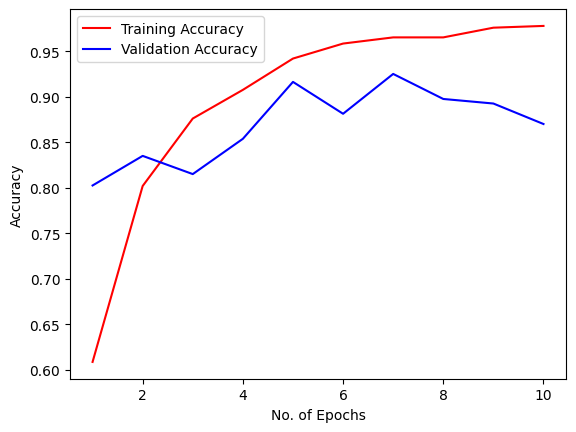

In [13]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,train_his.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,train_his.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
classname = val.class_names
classname


['healthy', 'sick_no_tb', 'tb']

In [15]:
pred = model.predict(val)
pred, pred.shape

35/37 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

I0000 00:00:1726319367.922470   99433 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_147', 528 bytes spill stores, 524 bytes spill loads



37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step


(array([[1.00000000e+00, 2.58643116e-08, 3.15722133e-08],
        [9.42950666e-01, 9.32789512e-10, 5.70493042e-02],
        [7.91613042e-01, 1.95117101e-01, 1.32698379e-02],
        [5.59764728e-02, 8.78342628e-01, 6.56808540e-02],
        [9.98425961e-01, 2.65818070e-08, 1.57406810e-03],
        [2.22347737e-15, 2.49458576e-13, 1.00000000e+00],
        [5.19722179e-02, 9.47478414e-01, 5.49326185e-04],
        [1.90308597e-07, 9.99785483e-01, 2.14296568e-04],
        [2.15230836e-03, 2.47484621e-07, 9.97847438e-01],
        [1.00000000e+00, 3.80932638e-14, 3.03791925e-09],
        [1.20224841e-01, 1.18773477e-02, 8.67897809e-01],
        [9.99999881e-01, 1.91818811e-10, 9.49433883e-08],
        [3.37157137e-04, 9.55887318e-01, 4.37754802e-02],
        [1.00000000e+00, 1.73461336e-16, 2.24402597e-11],
        [2.41538771e-07, 2.46785930e-03, 9.97531891e-01],
        [9.99999881e-01, 2.64927767e-11, 1.37930812e-07],
        [1.49643384e-07, 9.93976474e-01, 6.02335250e-03],
        [9.999

In [16]:
pred_cat = tf.argmax(pred, axis=1)
pred_cat

<tf.Tensor: shape=(291,), dtype=int64, numpy=
array([0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1,
       0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 0,
       2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 0, 0,
       0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1,
       2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2,
       1, 2, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1,
       0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2,
       2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2,
     

In [18]:
true_cat = tf.concat([y for x,y in test], axis=0)
true_cat

2024-09-14 18:39:48.333136: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(291, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
     

In [19]:
y_true = tf.argmax(true_cat, axis=1)
y_true


<tf.Tensor: shape=(291,), dtype=int64, numpy=
array([0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2,
       0, 1, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 0,
       1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2,
       0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 1,
       1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1,
       1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0,
       2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 0, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1,
       2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
     

In [ ]:
auc = metrics.roc_auc_score(y_true, pred_cat)
auc

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, pred_cat, target_names=classname))

              precision    recall  f1-score   support

     healthy       0.34      0.38      0.36       107
  sick_no_tb       0.30      0.20      0.24       107
          tb       0.28      0.36      0.31        77

    accuracy                           0.31       291
   macro avg       0.31      0.31      0.30       291
weighted avg       0.31      0.31      0.30       291



<Axes: >

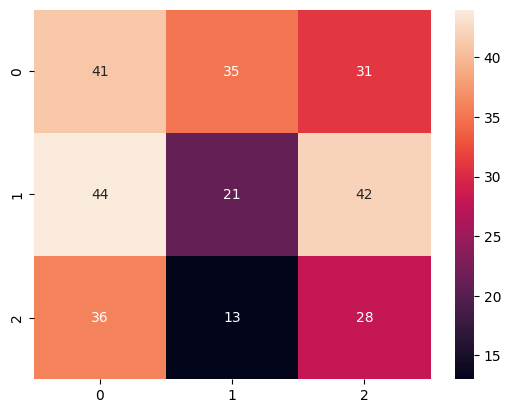

In [22]:
cm = confusion_matrix(y_true, pred_cat)
plt.figure()
sns.heatmap(cm, annot=True)

# TRY

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(
                                rescale = 1./255,
                                horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)
img_height,img_width=256,256
batch_size=8

In [12]:
train = image_gen.flow_from_directory(
      '/home/axernox/Resnet50/tbx11k-simplified_red/traincl',
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='categorical',
      batch_size=batch_size
      )

test = test_data_gen.flow_from_directory(
      '/home/axernox/Resnet50/tbx11k-simplified_red/testcl',
      target_size=(img_height, img_width),
      color_mode='rgb',
      shuffle=False, 
      class_mode='categorical',
      batch_size=batch_size
      )

val = test_data_gen.flow_from_directory(
      '/home/axernox/Resnet50/tbx11k-simplified_red/valcl',
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 2065 images belonging to 3 classes.
Found 291 images belonging to 3 classes.
Found 800 images belonging to 3 classes.


In [8]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early = EarlyStopping(monitor= "val_loss", mode= "min", patience= 3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]
train_his = model.fit(train, validation_data=val, epochs=20, batch_size=8, callbacks=callbacks_list)

Epoch 1/20


I0000 00:00:1726400235.801965    1147 service.cc:145] XLA service 0x7fc4ac016210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726400235.802089    1147 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-09-15 17:07:15.871979: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-15 17:07:16.183993: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  1/259 ━━━━━━━━━━━━━━━━━━━━ 1:05:29 15s/step - accuracy: 0.2500 - loss: 1.6657

I0000 00:00:1726400248.897490    1147 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_7', 196 bytes spill stores, 196 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_6', 68 bytes spill stores, 68 bytes spill loads

I0000 00:00:1726400248.903936    1147 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


258/259 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5618 - loss: 1.4764

2024-09-15 17:07:47.228296: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.03GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5623 - loss: 1.4740

I0000 00:00:1726400270.659380    1802 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_178', 540 bytes spill stores, 540 bytes spill loads



259/259 ━━━━━━━━━━━━━━━━━━━━ 39s 91ms/step - accuracy: 0.5627 - loss: 1.4717 - val_accuracy: 0.7987 - val_loss: 0.5822 - learning_rate: 1.0000e-04
Epoch 2/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.7730 - loss: 0.5522 - val_accuracy: 0.8163 - val_loss: 0.4982 - learning_rate: 1.0000e-04
Epoch 3/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.8112 - loss: 0.4743 - val_accuracy: 0.8313 - val_loss: 0.4516 - learning_rate: 1.0000e-04
Epoch 4/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.8282 - loss: 0.4166 - val_accuracy: 0.8275 - val_loss: 0.4479 - learning_rate: 1.0000e-04
Epoch 5/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - accuracy: 0.8694 - loss: 0.3295 - val_accuracy: 0.8263 - val_loss: 0.5188 - learning_rate: 1.0000e-04
Epoch 6/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - accuracy: 0.9211 - loss: 0.2148 - val_accuracy: 0.8675 - val_loss: 0.4120 - learning_rate: 1.0000e-04
Epoch 7/20
259/259 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - accurac

In [26]:
pred = model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


2024-09-15 17:16:50.082464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [22]:
classname = val.class_names
classname

['healthy', 'sick_no_tb', 'tb']

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=classname))

              precision    recall  f1-score   support

     healthy       0.95      0.97      0.96       107
  sick_no_tb       0.90      0.94      0.92       107
          tb       0.90      0.82      0.86        77

    accuracy                           0.92       291
   macro avg       0.92      0.91      0.91       291
weighted avg       0.92      0.92      0.92       291



<Axes: >

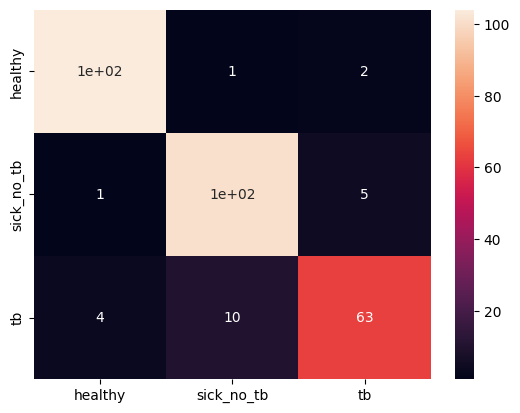

In [28]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=classname, yticklabels=classname)

In [29]:
model.save('customcnn_canny.keras')

In [30]:
import json
with open("customcnn_canny.json", "w") as f:
    json.dump(train_his.history, f)

## TEST

In [6]:
model = load_model('/home/axernox/Resnet50/customcnn_canny.keras')

In [40]:
pred = model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 235ms/step


In [23]:
X_train = list(map(lambda x: x[0], test))
y_train = list(map(lambda x: x[1], test))

In [33]:
classname = test.class_names

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=classname))

              precision    recall  f1-score   support

     healthy       0.95      0.97      0.96       107
  sick_no_tb       0.90      0.94      0.92       107
          tb       0.90      0.82      0.86        77

    accuracy                           0.92       291
   macro avg       0.92      0.91      0.91       291
weighted avg       0.92      0.92      0.92       291



<Axes: >

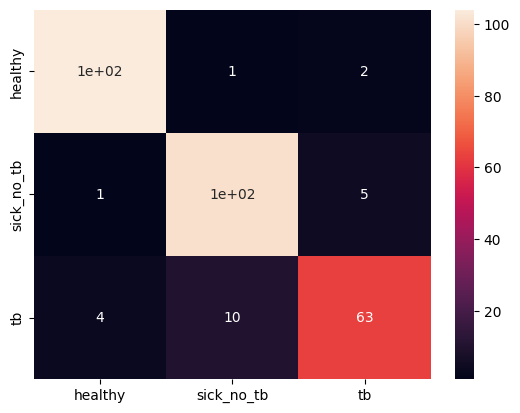

In [42]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=classname, yticklabels=classname)